In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer 
import scipy.stats as stats
from sklearn.linear_model import RidgeCV
from sklearn.cluster import KMeans
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import xgboost as xgb

In [2]:
df = pd.read_csv('California_Houses.csv')
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


# EDA

In [3]:
# Data Types of Each Column
df.dtypes

Median_House_Value          float64
Median_Income               float64
Median_Age                    int64
Tot_Rooms                     int64
Tot_Bedrooms                  int64
Population                    int64
Households                    int64
Latitude                    float64
Longitude                   float64
Distance_to_coast           float64
Distance_to_LA              float64
Distance_to_SanDiego        float64
Distance_to_SanJose         float64
Distance_to_SanFrancisco    float64
dtype: object

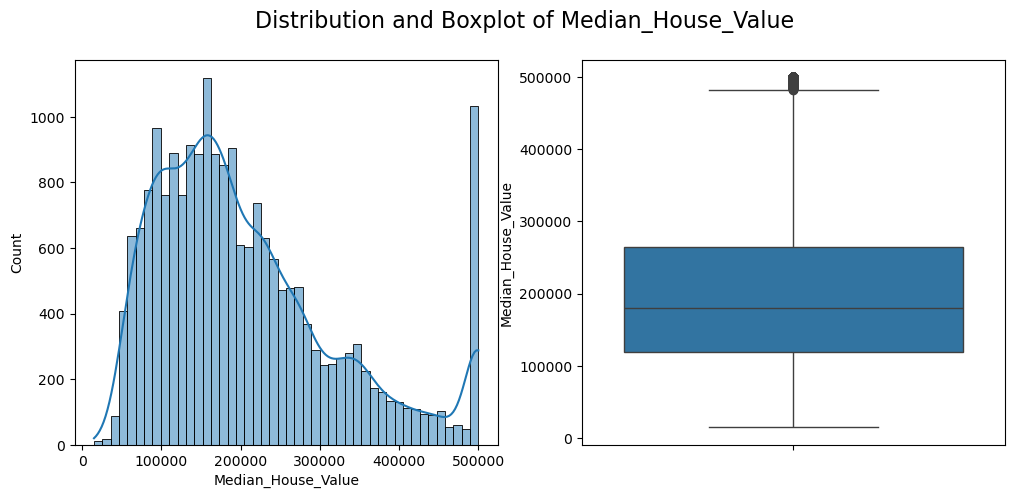

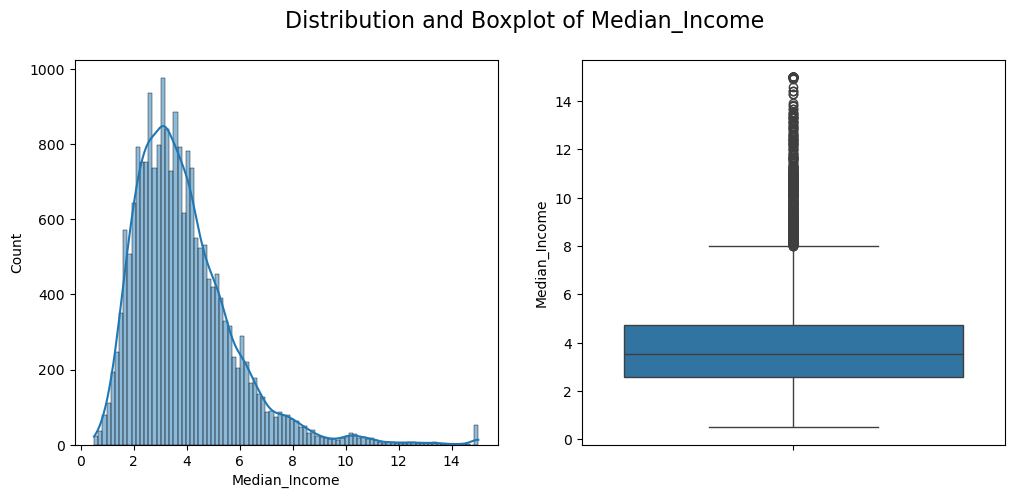

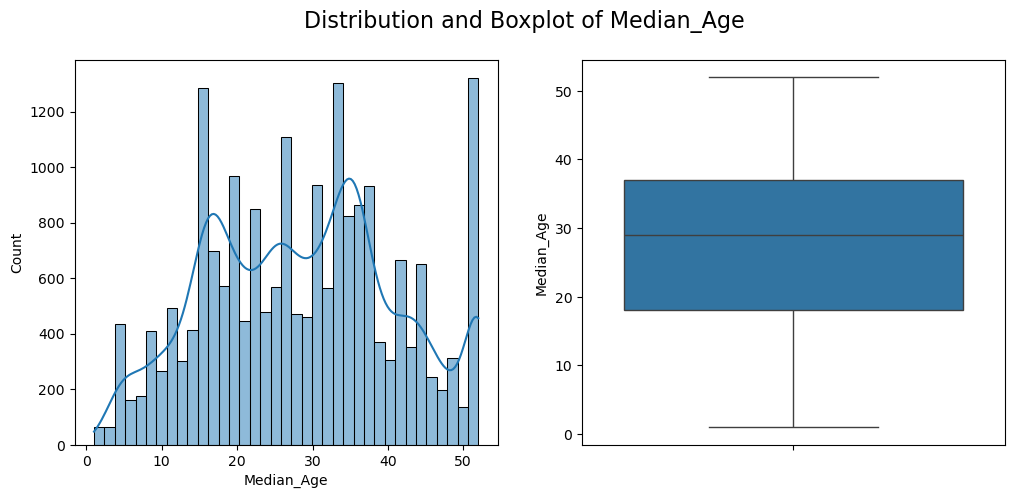

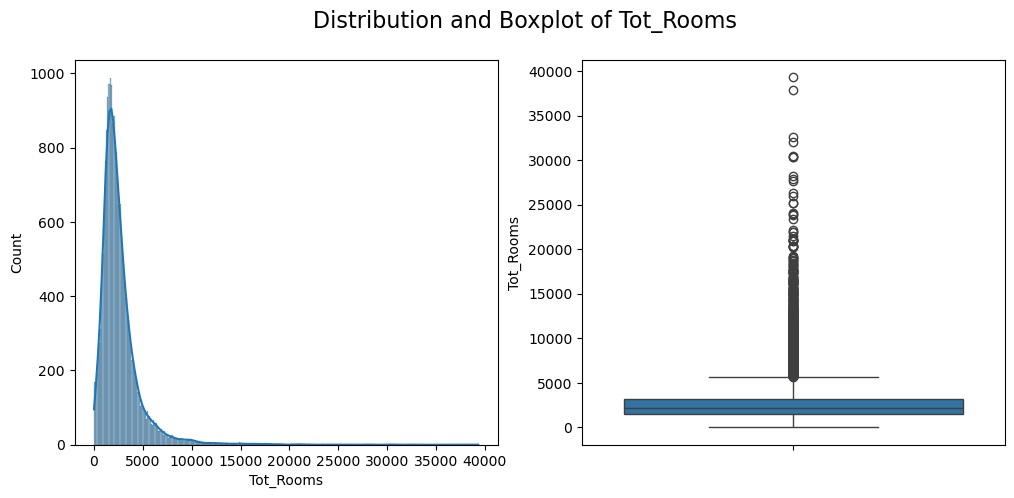

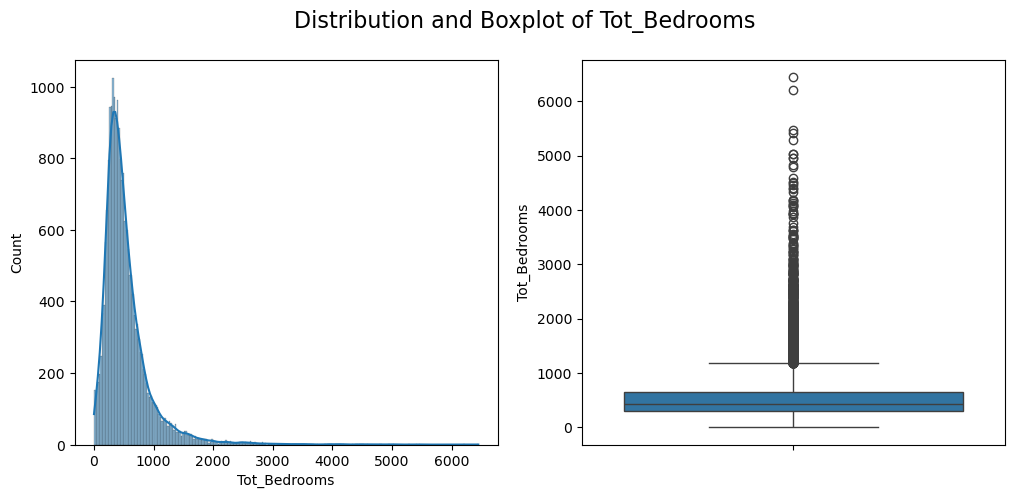

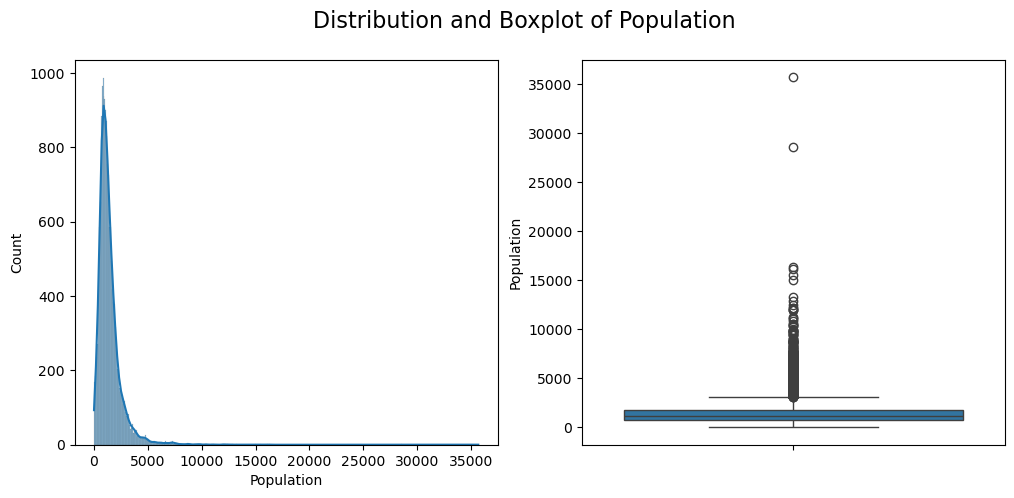

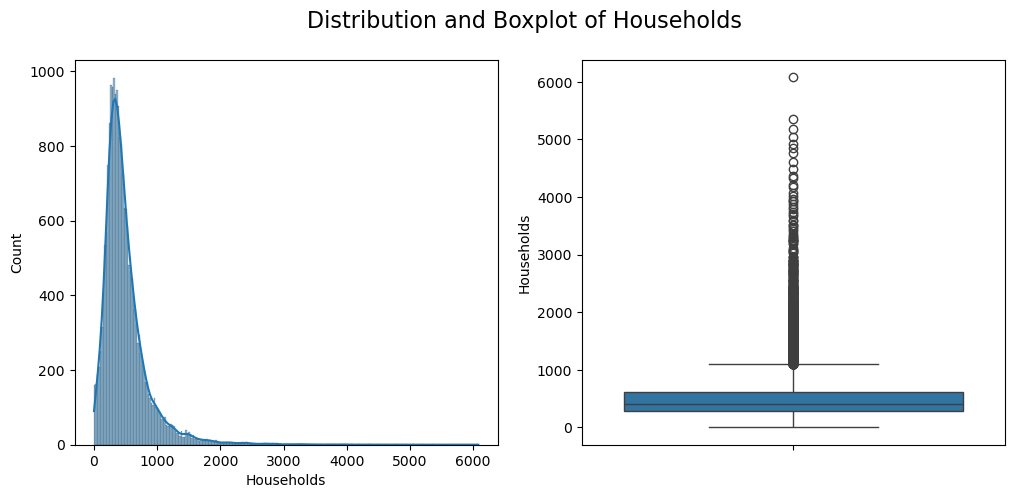

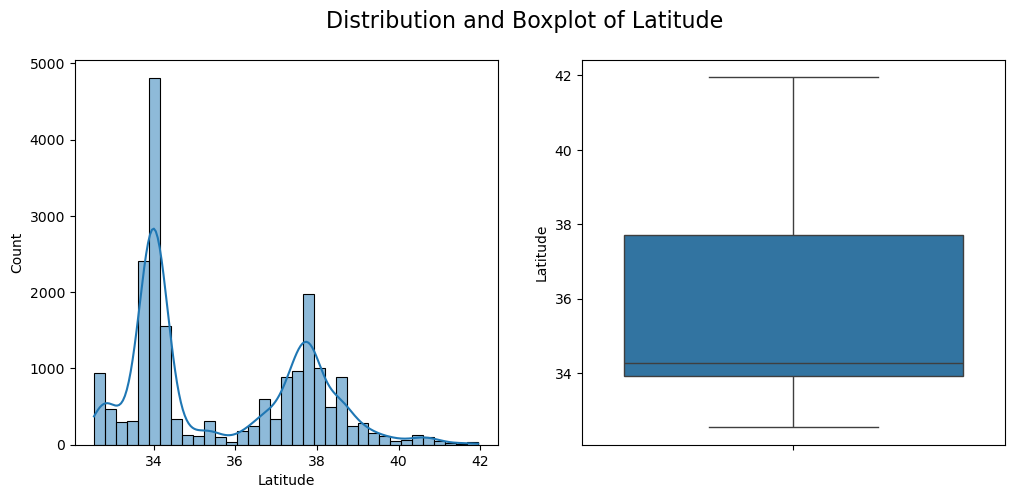

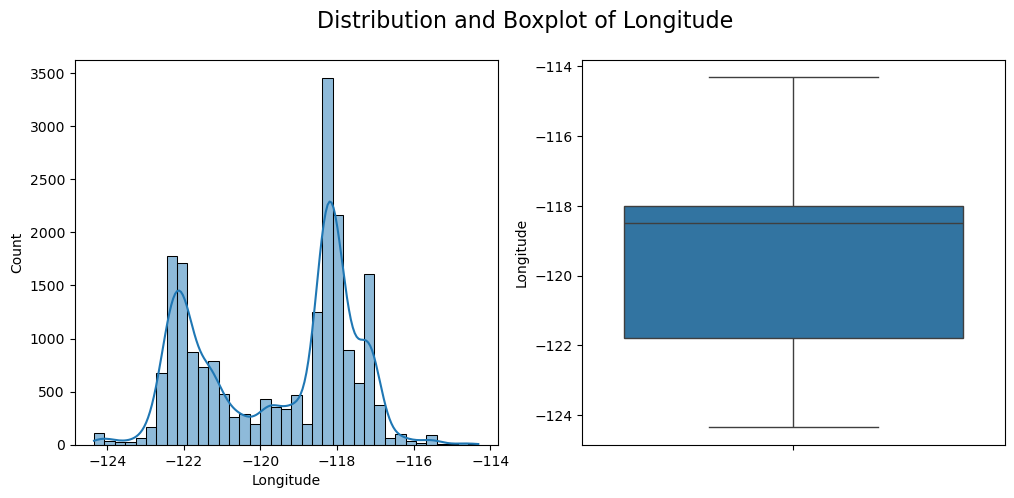

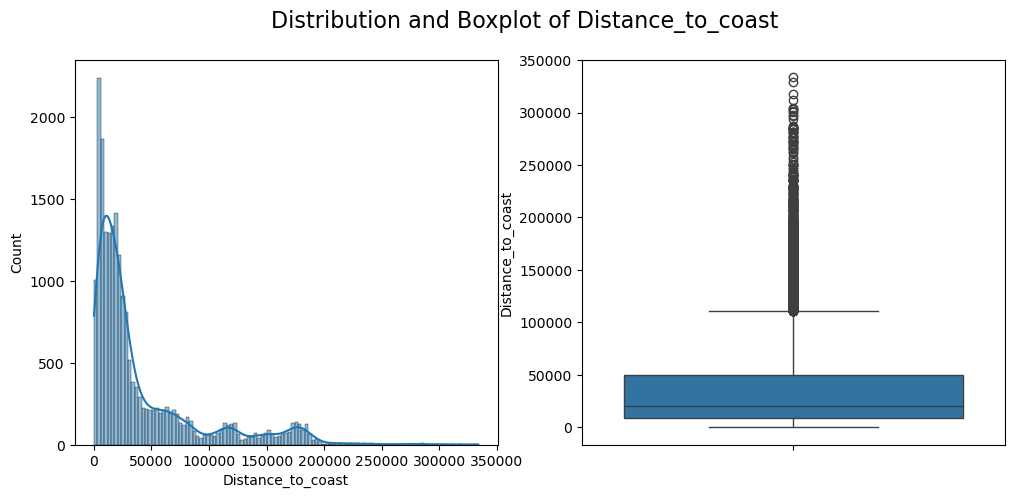

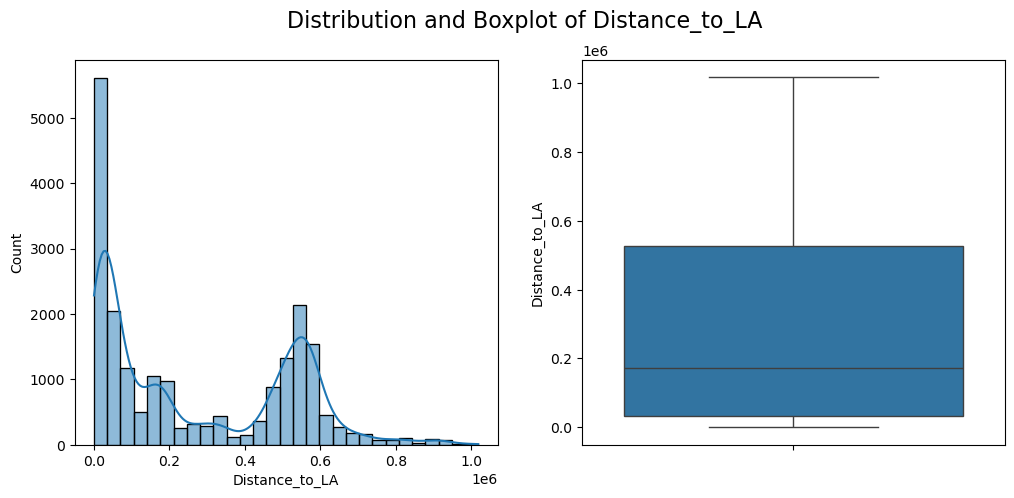

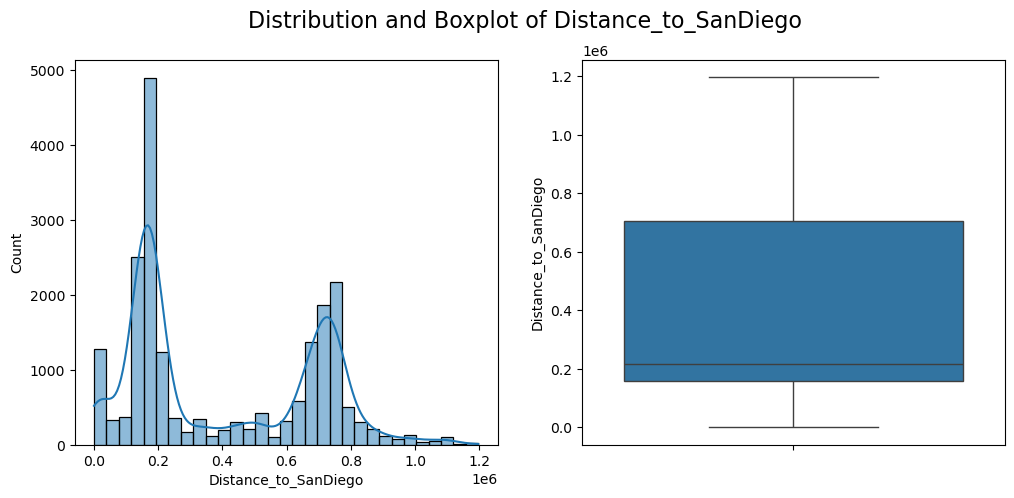

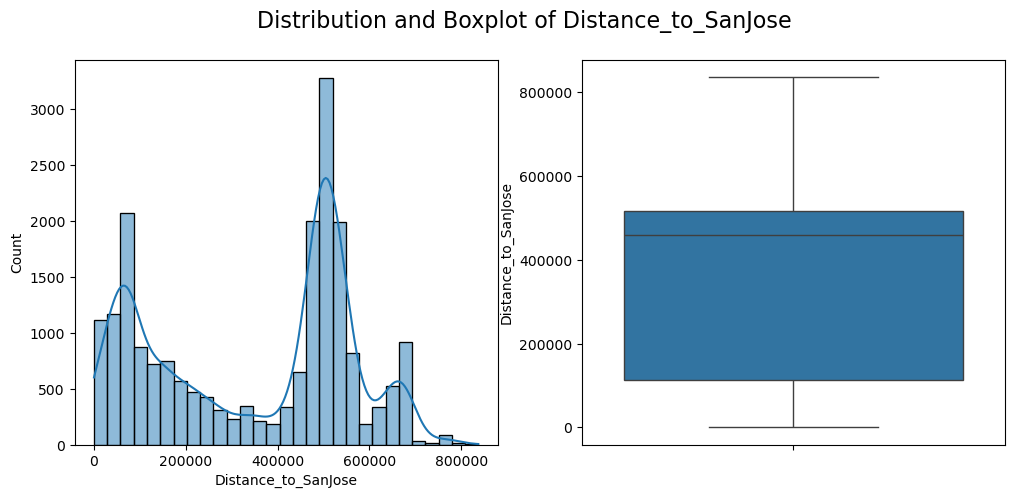

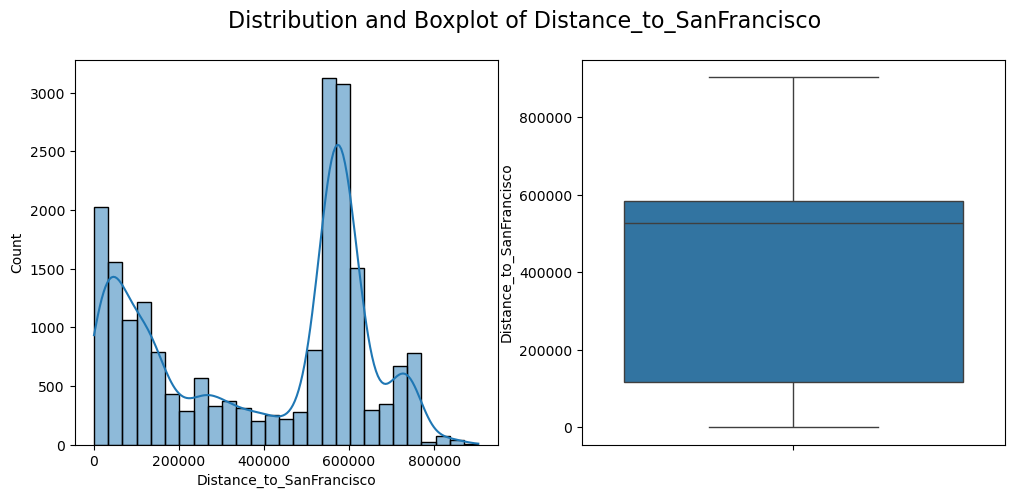

In [4]:
# Plotting Distributions and Boxplots for Each Column
for i in range(len(df.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(df.iloc[:, i], kde=True, ax=ax[0])
    sns.boxplot(y=df.iloc[:, i], ax=ax[1])
    plt.suptitle(f'Distribution and Boxplot of {df.columns[i]}', fontsize=16)
    plt.show()

In [5]:
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


## K-means

Before running the main analysis, let's inspect the data if there are any clusters.

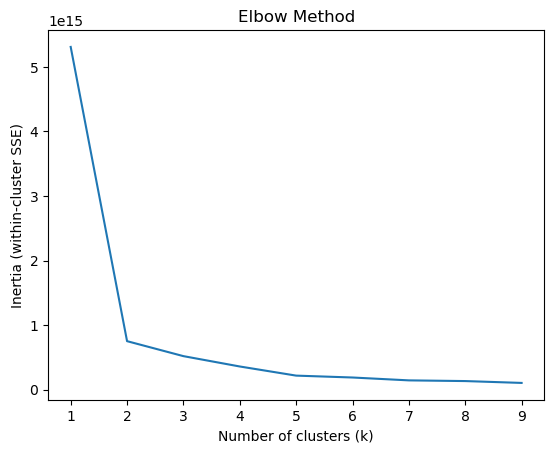

In [6]:
inertia_values = []
k_range = range(1, 10)
X = df.drop('Median_House_Value', axis=1)
#X = X[~df['is_outlier']]  # Exclude outliers
#X = X.drop('is_outlier', axis=1)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    inertia_values.append(km.inertia_)

# Plotting the Elbow Method
plt.plot(k_range, inertia_values)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Method")
plt.show()

We can see that there is strong evidence for 2 clusters in the data (though we can allocate up to 5 clusters, but it can be redundant). We'll add them to the data as a dummy variable.

In [7]:
# Fitting KMeans with 2 clusters
X = df.drop(['Median_House_Value'], axis=1)
km = KMeans(n_clusters=2, random_state=0)
km.fit(X)

df['is_cluster_1'] = (km.labels_ == 1).astype(int)

In [8]:
# Cluster Centers
pd.DataFrame(km.cluster_centers_, columns=X.columns)

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,3.937811,28.523130,2702.579747,562.521942,1527.400051,521.590103,33.907437,-117.989127,30900.862211,70186.024075,161777.144233,520954.430709,588775.922835
1,3.781386,28.794221,2546.908003,505.152275,1289.935659,470.216277,37.925059,-121.671610,53286.846087,534372.745406,712521.468689,120766.103281,117945.579542


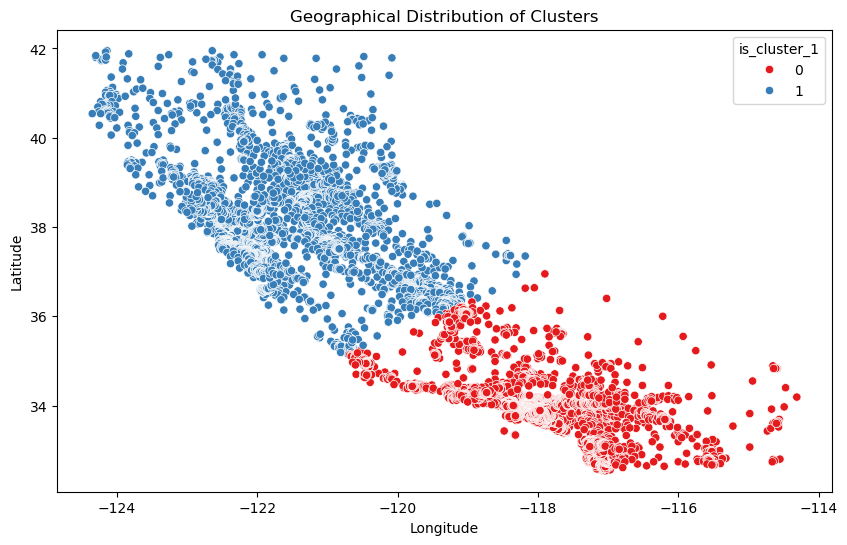

In [9]:
# Geographical Distribution of Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='is_cluster_1', palette='Set1')
plt.title('Geographical Distribution of Clusters')
plt.show()

In [10]:
# Mean house values by cluster
df.groupby('is_cluster_1')['Median_House_Value'].mean()

is_cluster_1
0    215769.248366
1    195002.432103
Name: Median_House_Value, dtype: float64

If we dare to interpret the clusters, one can notice that the first cluster is more to the South and house values are higher there, while the other one is more to the North with lower prices.

We also saw the distribution of the `Median_House_Value` that has a lot of values on the right tail of the distribution. Probably, these are elite houses with very large prices. We'll encode them accordingly.

In [11]:
df['is_elite'] = np.where(df['Median_House_Value'] > 495*10**3, 1, 0)
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,is_cluster_1,is_elite
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,1,0
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,1,0
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,1,0
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,1,0
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417,1,0
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634,1,0
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232,1,0
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166,1,0


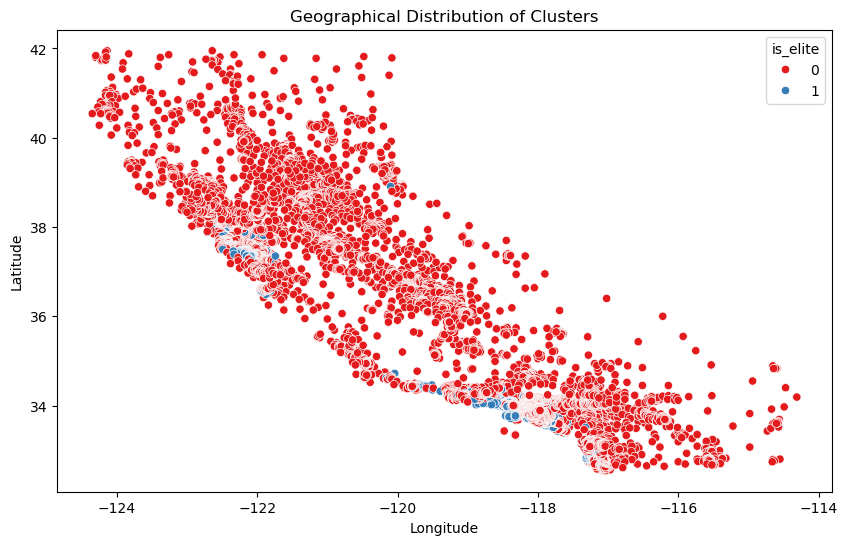

In [12]:
# Geographical Distribution of Elite Households
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='is_elite', palette='Set1')
plt.title('Geographical Distribution of Clusters')
plt.show()

We can see that there are some blue spots indicating elite neighborhoods.

In [13]:
# train-test split
X = df.drop('Median_House_Value', axis=1)
y = df['Median_House_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Models

## Linear Regression

In [14]:
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

Before we analyze the performance on the test data, let's have a look at some diagnostic metrics.

In [15]:
# R^2 on training data
r2_score(y_train, lm_model.predict(X_train))

0.7096609022056816

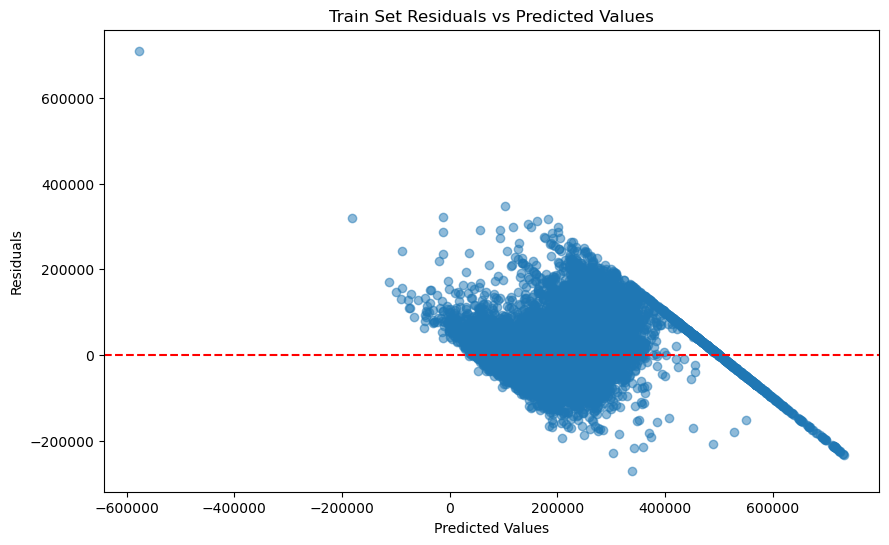

In [16]:
# Plotting residuals for training data

# predictions and residuals
train_preds = lm_model.predict(X_train)
train_errors = y_train - train_preds

# plot 
plt.figure(figsize=(10, 6))
plt.scatter(train_preds, train_errors, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Train Set Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

There is clear pattern in the data that the model can't capture. Let's try to apply the Box-Cox (Yeo-Johnson) transformation.

### Box-Cox Transformation

Note that we can't apply Box-Cox transformation to the dummy variable, so we should account for that.

In [17]:
# Yeo-Johnson (Box-Cox) transformation for both features and target
X_train_but_cluster = X_train.drop(['is_cluster_1','is_elite'], axis=1)
pt = PowerTransformer(method='yeo-johnson')
X_train_but_cluster_transformed = pt.fit_transform(X_train_but_cluster)
# adding back the cluster dummy variable
X_train_transformed = np.hstack((X_train_but_cluster_transformed, X_train[['is_cluster_1','is_elite']].values))

pt_y = PowerTransformer(method='yeo-johnson')
y_train_transformed = pt_y.fit_transform(y_train.to_frame())


In [18]:
# Box-Cox transformed Linear Regression
lm_model_bc = LinearRegression()
lm_model_bc.fit(X_train_transformed, y_train_transformed)

LinearRegression()

In [19]:
# R^2 on training data
r2_score(y_train_transformed, lm_model_bc.predict(X_train_transformed))

0.7326509228333986

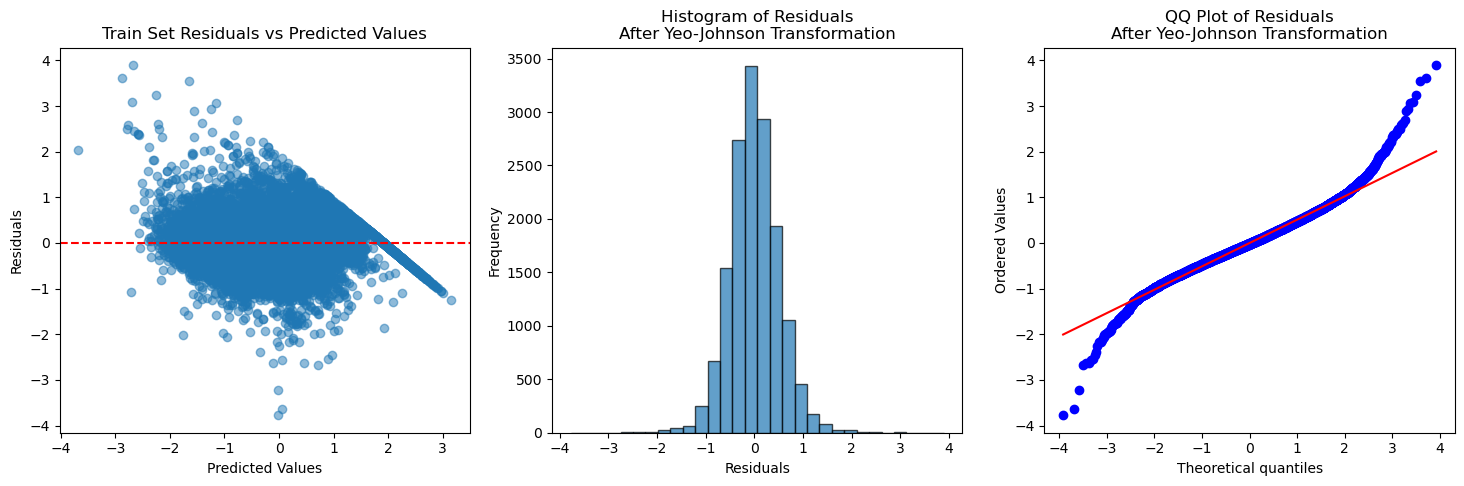

In [20]:
# Plotting residuals for training data

# predictions and residuals
train_preds = lm_model_bc.predict(X_train_transformed)
train_errors = y_train_transformed - train_preds

# Plots Residuals vs Predicted Values, Histogram of Residuals, QQ Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
# Residuals vs Predicted Values
ax[0].scatter(train_preds, train_errors, alpha=0.5)
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('Train Set Residuals vs Predicted Values')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')
# Histogram of Residuals
ax[1].hist(train_errors, bins=30, edgecolor='k', alpha=0.7)
ax[1].set_title('Histogram of Residuals\nAfter Yeo-Johnson Transformation')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')
# QQ Plot
stats.probplot(train_errors.flatten(), dist="norm", plot=ax[2])
ax[2].set_title('QQ Plot of Residuals\nAfter Yeo-Johnson Transformation')
plt.show()

There is still pattern in the residuals, however now it looks better. Also, $R^2$ has increased. Based on QQ-plot, the residuals are not exactly normally distributed at the tails. This is raather a t-distribution with fat tails. Anyway, this case is more or less acceptable.

In [21]:
# Predictions on the test data with Yeo-Johnson transformation (using the same transformers as training data)

# Transform test data
X_test_but_cluster = X_test.drop(['is_cluster_1','is_elite'], axis=1)
X_test_but_cluster_transformed = pt.transform(X_test_but_cluster)
X_test_transformed = np.hstack((X_test_but_cluster_transformed, X_test[['is_cluster_1','is_elite']].values))

y_test_transformed = pt_y.fit_transform(y_test.to_frame())


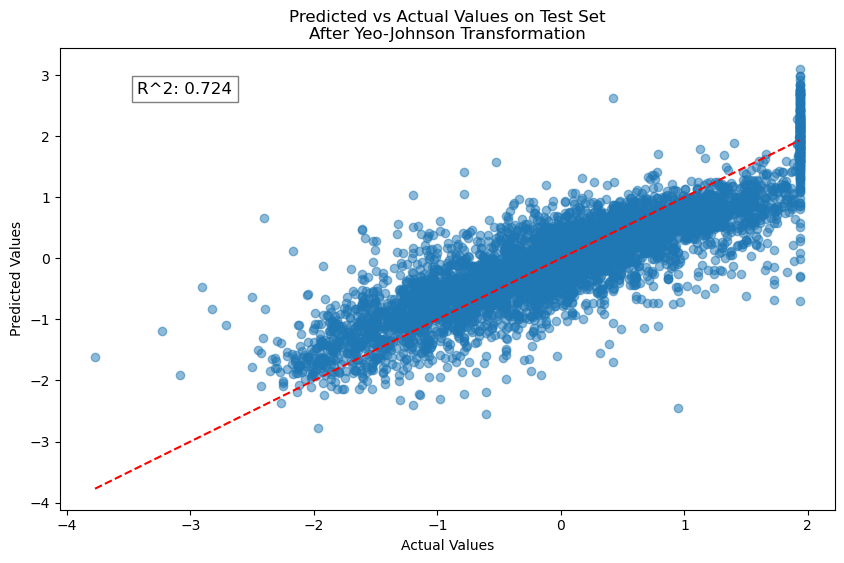

In [22]:
# Predict using the transformed model
test_preds_transformed = lm_model_bc.predict(X_test_transformed)

# R^2 on test data
r_squared = r2_score(y_test_transformed, test_preds_transformed)

# Plot predicted data vs actual data for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_transformed, test_preds_transformed, alpha=0.5)
plt.plot([y_test_transformed.min(), y_test_transformed.max()], [y_test_transformed.min(), y_test_transformed.max()], 'r--')
plt.text(0.1, 0.9, f'R^2: {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.title('Predicted vs Actual Values on Test Set\nAfter Yeo-Johnson Transformation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [23]:
# Coefficients of the model
print(f'Intercept: {round(lm_model_bc.intercept_[0],4)}')
for idx, col_name in enumerate(X_train.columns):
    print(f'{col_name}: {round(lm_model_bc.coef_[0][idx],4)}')

Intercept: -0.1019
Median_Income: 0.5217
Median_Age: -0.0193
Tot_Rooms: -0.0043
Tot_Bedrooms: 0.2654
Population: -0.4501
Households: 0.2081
Latitude: -0.1983
Longitude: 0.0
Distance_to_coast: -0.2959
Distance_to_LA: -0.3932
Distance_to_SanDiego: 0.0266
Distance_to_SanJose: -0.1499
Distance_to_SanFrancisco: -0.2237
is_cluster_1: 0.1579
is_elite: 0.6837


In order to improve generalization, let's try to use different techiques (Ridge, Lasso).

### Ridge Regression

In [24]:
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=10)
ridge_model.fit(X_train_transformed, y_train_transformed)
print(f'Best alpha = {ridge_model.alpha_}')

Best alpha = 10.0


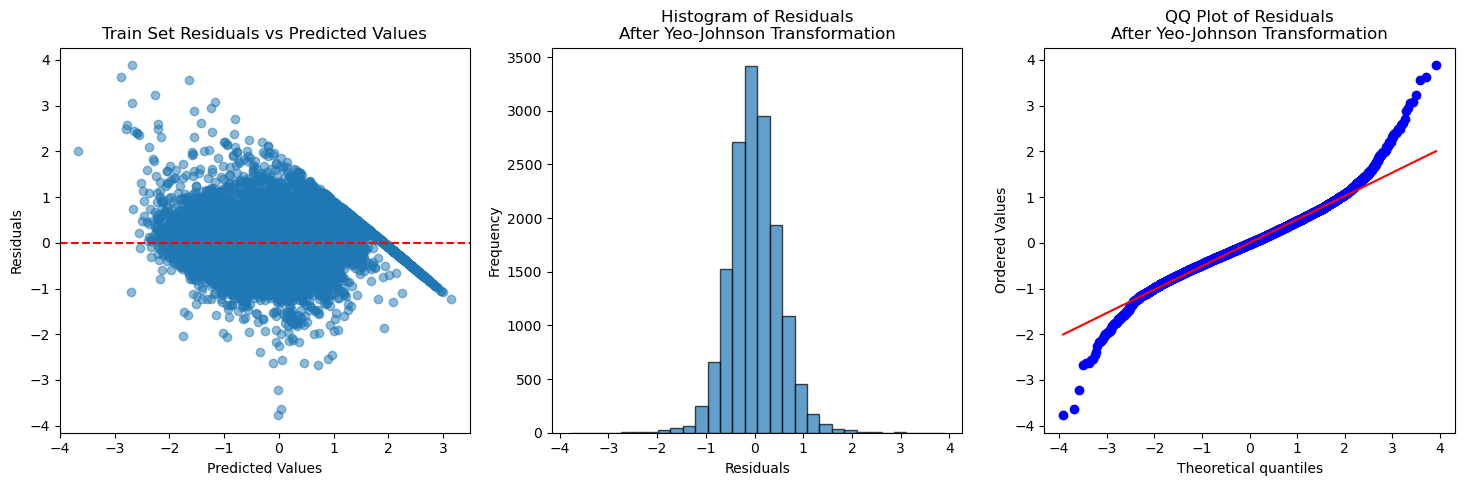

In [25]:
# Diagnostics for Ridge Regression
# Plotting residuals for training data

# predictions and residuals
train_preds = ridge_model.predict(X_train_transformed)
train_errors = y_train_transformed - train_preds

# Plots Residuals vs Predicted Values, Histogram of Residuals, QQ Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
# Residuals vs Predicted Values
ax[0].scatter(train_preds, train_errors, alpha=0.5)
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('Train Set Residuals vs Predicted Values')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')
# Histogram of Residuals
ax[1].hist(train_errors, bins=30, edgecolor='k', alpha=0.7)
ax[1].set_title('Histogram of Residuals\nAfter Yeo-Johnson Transformation')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')
# QQ Plot
stats.probplot(train_errors.flatten(), dist="norm", plot=ax[2])
ax[2].set_title('QQ Plot of Residuals\nAfter Yeo-Johnson Transformation')
plt.show()

In [26]:
r2_score(y_train_transformed, ridge_model.predict(X_train_transformed))

0.7326415614758071

These plots are similar to the OLS with transformations. $R^2$ is the same. However, let's see at the test data.

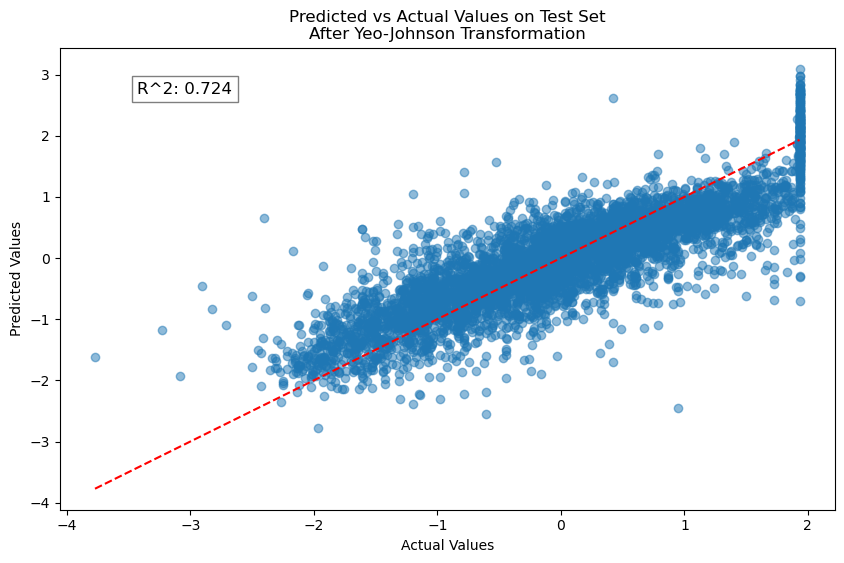

In [27]:
# Predict using the transformed model
test_preds_transformed = ridge_model.predict(X_test_transformed)

# R^2 on test data
r_squared = r2_score(y_test_transformed, test_preds_transformed)

# Plot predicted data vs actual data for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_transformed, test_preds_transformed, alpha=0.5)
plt.plot([y_test_transformed.min(), y_test_transformed.max()], [y_test_transformed.min(), y_test_transformed.max()], 'r--')
plt.text(0.1, 0.9, f'R^2: {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.title('Predicted vs Actual Values on Test Set\nAfter Yeo-Johnson Transformation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

No difference. $R^2$ is the same as for the previous model.

In [28]:
# Coefficients of the model
print(f'Intercept: {round(ridge_model.intercept_[0],4)}')
for idx, col_name in enumerate(X_train.columns):
    print(f'{col_name}: {round(ridge_model.coef_[0][idx],4)}')

Intercept: -0.0958
Median_Income: 0.5211
Median_Age: -0.0188
Tot_Rooms: -0.0008
Tot_Bedrooms: 0.2622
Population: -0.4476
Households: 0.2055
Latitude: -0.1842
Longitude: -0.0
Distance_to_coast: -0.2979
Distance_to_LA: -0.3915
Distance_to_SanDiego: 0.0182
Distance_to_SanJose: -0.1561
Distance_to_SanFrancisco: -0.2167
is_cluster_1: 0.1449
is_elite: 0.6741


### Lasso Regression

In [29]:
lasso_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=10)
lasso_model.fit(X_train_transformed, y_train_transformed)
print(f'Best alpha = {lasso_model.alpha_}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha = 0.0001


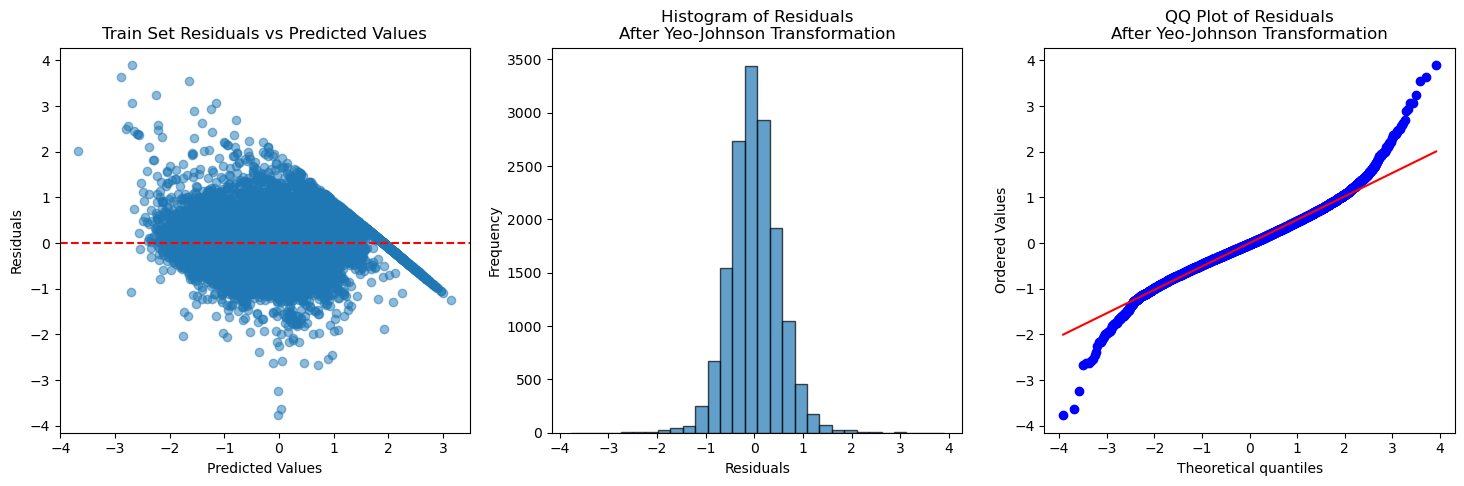

In [30]:
# Diagnostics for Lasso Regression
# Plotting residuals for training data

# predictions and residuals
train_preds = lasso_model.predict(X_train_transformed)
train_errors = y_train_transformed.ravel() - train_preds

# Plots Residuals vs Predicted Values, Histogram of Residuals, QQ Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
# Residuals vs Predicted Values
ax[0].scatter(train_preds, train_errors, alpha=0.5)
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('Train Set Residuals vs Predicted Values')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')
# Histogram of Residuals
ax[1].hist(train_errors, bins=30, edgecolor='k', alpha=0.7)
ax[1].set_title('Histogram of Residuals\nAfter Yeo-Johnson Transformation')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')
# QQ Plot
stats.probplot(train_errors.flatten(), dist="norm", plot=ax[2])
ax[2].set_title('QQ Plot of Residuals\nAfter Yeo-Johnson Transformation')
plt.show()

In [31]:
r2_score(y_train_transformed, lasso_model.predict(X_train_transformed))

0.7326454031316548

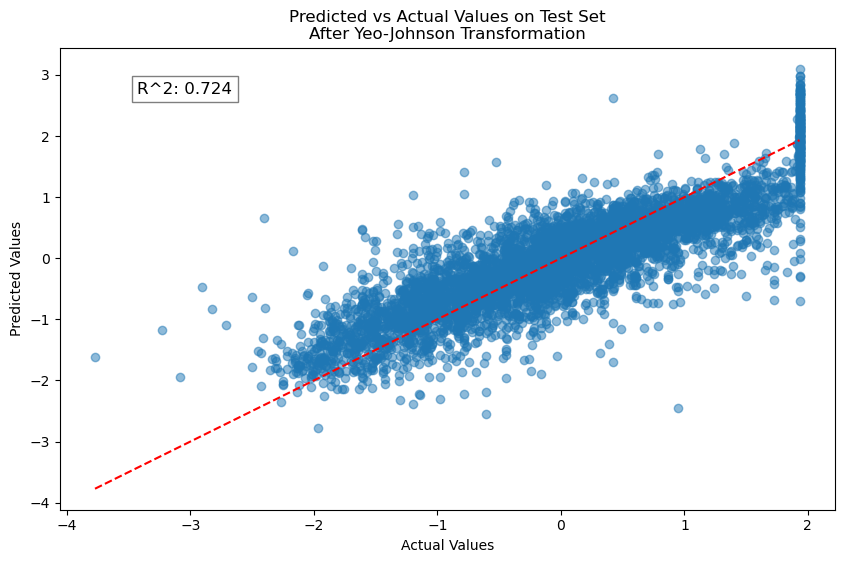

In [32]:
# Predict using the transformed model
test_preds_transformed = lasso_model.predict(X_test_transformed)

# R^2 on test data
r_squared = r2_score(y_test_transformed, test_preds_transformed)

# Plot predicted data vs actual data for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_transformed, test_preds_transformed, alpha=0.5)
plt.plot([y_test_transformed.min(), y_test_transformed.max()], [y_test_transformed.min(), y_test_transformed.max()], 'r--')
plt.text(0.1, 0.9, f'R^2: {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.title('Predicted vs Actual Values on Test Set\nAfter Yeo-Johnson Transformation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [33]:
# Coefficients of the model
print(f'Intercept: {round(lasso_model.intercept_,4)}')
for idx, col_name in enumerate(X_train.columns):
    print(f'{col_name}: {round(lasso_model.coef_[idx],4)}')

Intercept: -0.0964
Median_Income: 0.5206
Median_Age: -0.0191
Tot_Rooms: -0.0
Tot_Bedrooms: 0.262
Population: -0.4488
Households: 0.206
Latitude: -0.1801
Longitude: -0.0
Distance_to_coast: -0.2976
Distance_to_LA: -0.393
Distance_to_SanDiego: 0.0137
Distance_to_SanJose: -0.1552
Distance_to_SanFrancisco: -0.219
is_cluster_1: 0.1453
is_elite: 0.6817


## Random Forest 

We will use the original data set here because random forest is a non-parametric model and the original scale gives more opportunities to interpret the data.

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train.ravel())

/var/folders/c1/j7j1d7kn4p5_h0sgv2fb_2dm0000gn/T/ipykernel_9680/1817436867.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_model.fit(X_train, y_train.ravel())


RandomForestRegressor(random_state=0)

In [35]:
r2_score(y_train, rf_model.predict(X_train))

0.981651329337055

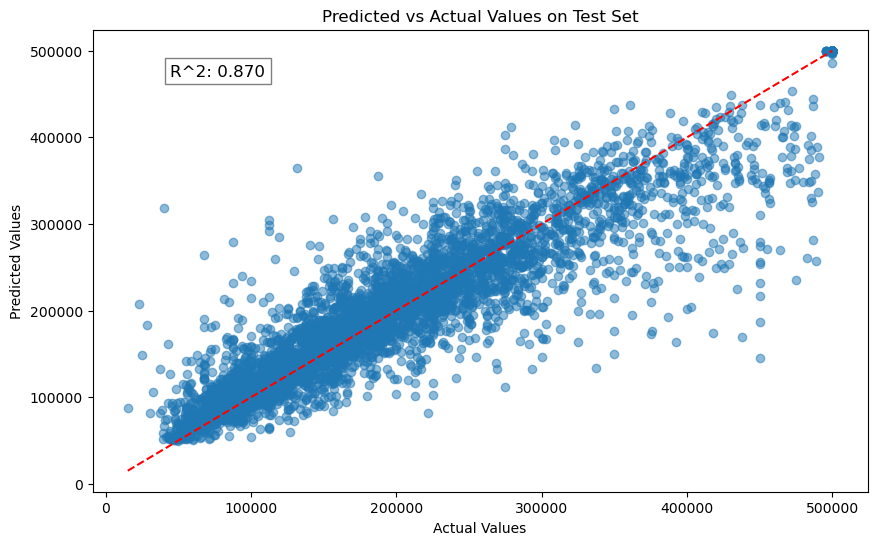

In [36]:
# Predict testing data
test_preds = rf_model.predict(X_test)

# R^2 on test data
r_squared = r2_score(y_test, test_preds)

# Plot predicted data vs actual data for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.text(0.1, 0.9, f'R^2: {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.title('Predicted vs Actual Values on Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

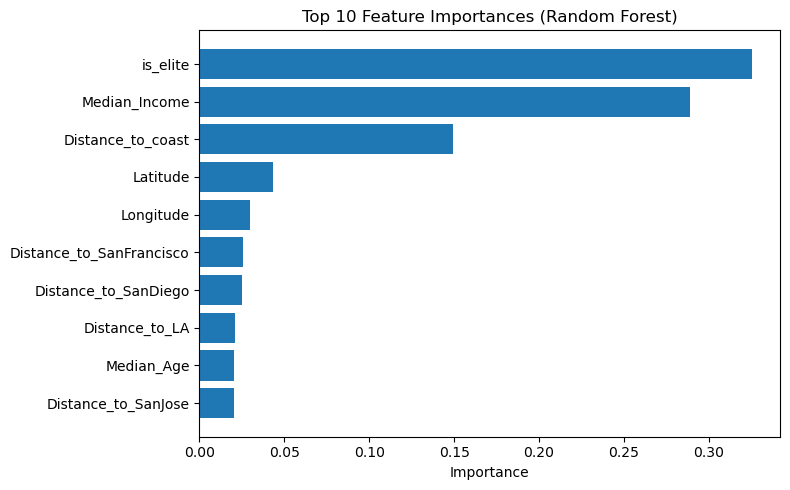

In [37]:
# Top-10 feature importance
# Importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]

# Reverse for plotting so the most important is on top
top_features = importances[indices][::-1]
top_labels = X_test.columns[indices][::-1]

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(range(10), top_features, align="center")
plt.yticks(range(10), top_labels)
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

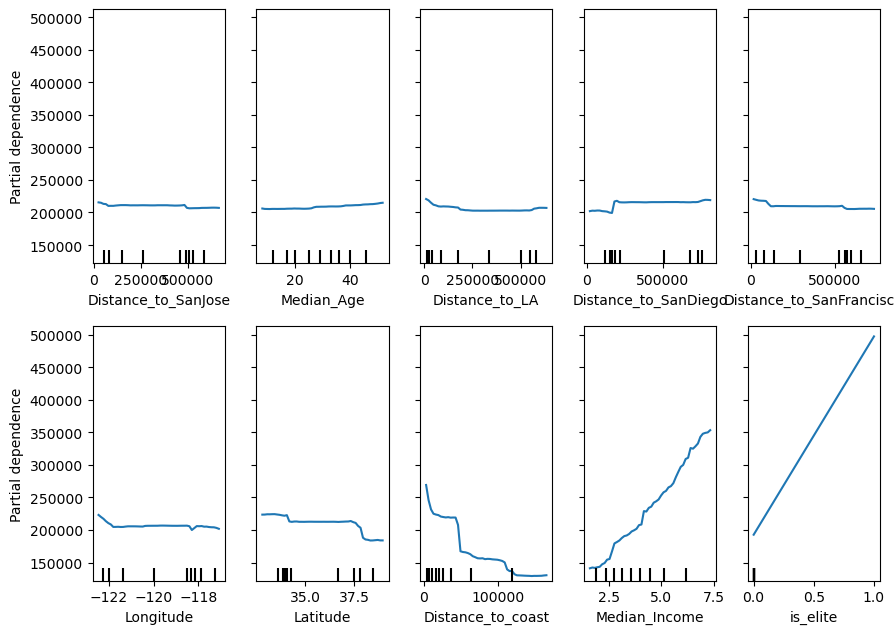

In [38]:
# Partial Dependence Plots for Top-10 features
fig, ax = plt.subplots(2,5, figsize=(9, 6))
PartialDependenceDisplay.from_estimator(
    rf_model, 
    X_train, 
    top_labels, 
    grid_resolution=50,
    ax=ax,
    n_jobs=6
)
plt.tight_layout()
plt.subplots_adjust(top=1.05)
plt.show()

Three main predictors revealed by random forest are whether the house is located in an elite neighborhood, median income of an owner, and distance to the coast. Based on that we can hypothesize that people with larger income tend to buy houses in more elite areas and closer to the coast.

## XGBoost

In [39]:
xgb_model = xgb.XGBRegressor(
    n_estimators = 100
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [40]:
r2_score(y_train, xgb_model.predict(X_train))

0.9523004107127004

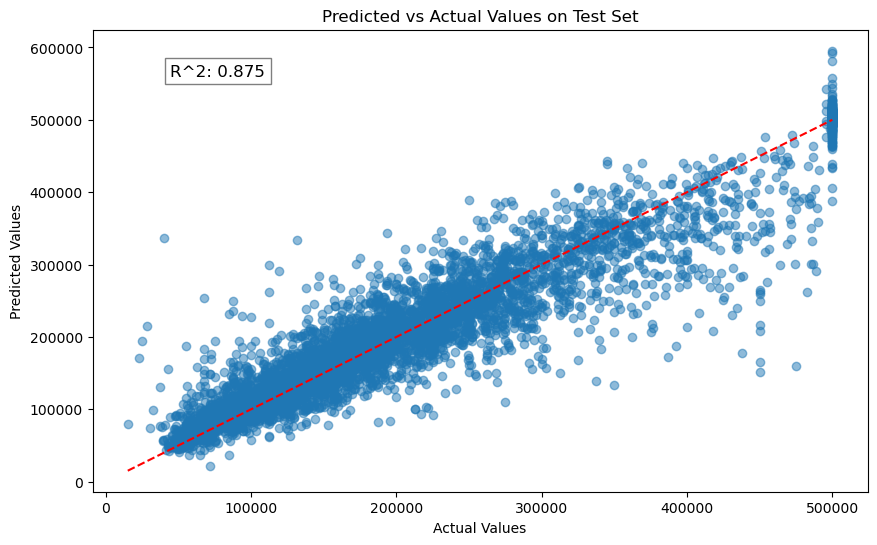

In [41]:
# Predict testing data
test_preds = xgb_model.predict(X_test)

# R^2 on test data
r_squared = r2_score(y_test, test_preds)

# Plot predicted data vs actual data for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.text(0.1, 0.9, f'R^2: {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.title('Predicted vs Actual Values on Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

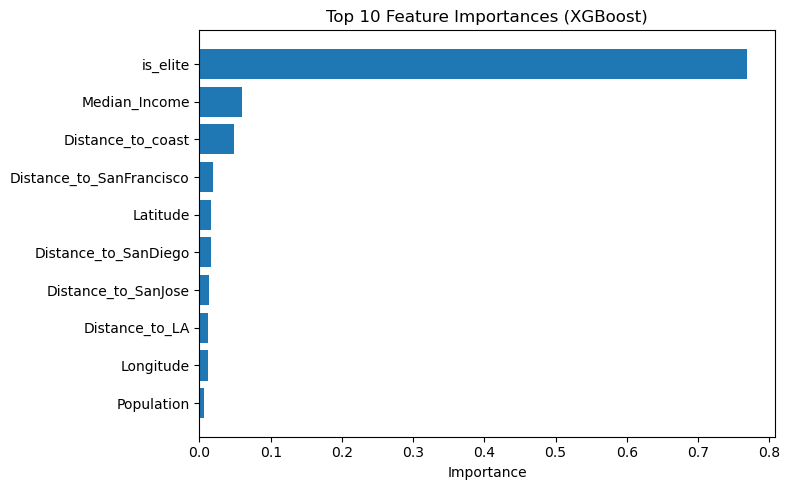

In [42]:
# Top-10 feature importance
# Importances
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]

# Reverse for plotting so the most important is on top
top_features = importances[indices][::-1]
top_labels = X_test.columns[indices][::-1]

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(range(10), top_features, align="center")
plt.yticks(range(10), top_labels)
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

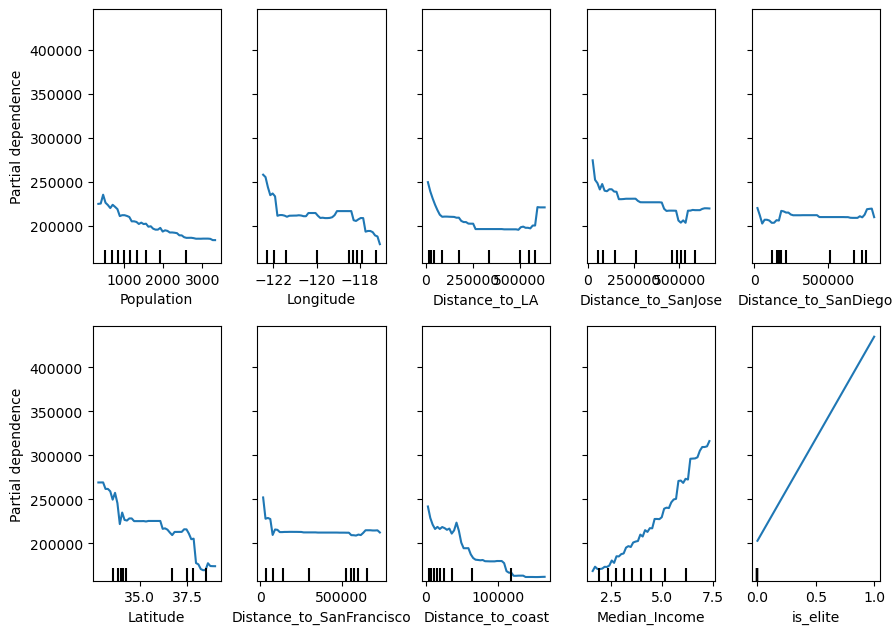

In [43]:
# Partial Dependence Plots for Top-10 features
fig, ax = plt.subplots(2,5, figsize=(9, 6))
PartialDependenceDisplay.from_estimator(
    xgb_model, 
    X_train, 
    top_labels, 
    grid_resolution=50,
    ax=ax,
    n_jobs=6
)
plt.tight_layout()
plt.subplots_adjust(top=1.05)
plt.show()

The most important feature is whether a house is located in elite area.

# Model Comparison

In [44]:
# R2 scores for each model
r2_lm = r2_score(y_test_transformed, lm_model_bc.predict(X_test_transformed))
r2_ridge = r2_score(y_test_transformed, ridge_model.predict(X_test_transformed))
r2_lasso = r2_score(y_test_transformed, lasso_model.predict(X_test_transformed))
r2_rf = r2_score(y_test,rf_model.predict(X_test))
r2_xgb = r2_score(y_test,xgb_model.predict(X_test))

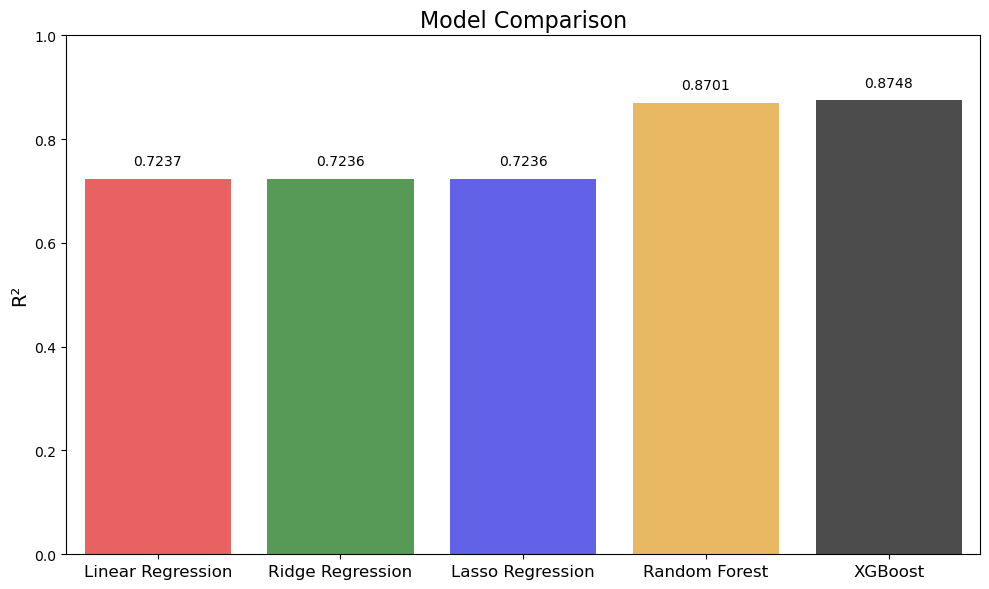

In [215]:
# Visualize the comparison
model_names = ['Linear Regression','Ridge Regression', 'Lasso Regression','Random Forest', 'XGBoost']
models_r2 = [r2_lm,r2_ridge,r2_lasso,r2_rf,r2_xgb]

plt.figure(figsize=(10,6))
sns.barplot(x = model_names, 
            y = models_r2,
            legend=False,
            hue = model_names,
            palette=['red','green','blue','orange','black'],
            alpha = 0.7)

# Add R² values as text on top of each bar
for i, (name, r2) in enumerate(zip(model_names, models_r2)):
    plt.text(i, r2 + 0.02, f'{r2:.4f}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Model Comparison', fontsize = 16)
plt.xticks(fontsize = 12)
plt.ylim([0,1])
plt.ylabel('R²', fontsize = 14)
plt.tight_layout()
plt.show()

# Summary

The best performance was showm by XGBoost model with $R^2 = .8748$ on test data and similar performance was shown by random forest with $R^2 = .8701$. Both models indicate distance to the coast, median income, and whether the area is elite or not as top-3 most important features. 

We can hypothesize that people with higher income tend to buy houses closer to the coast and in more elite areas which costs more. However, this hypothesis needs to be properly evaluated later in terms of interaction between certain features. For now, we can only say that the most expensive houses are owned by people with larger salaries and are located in elite areas or close to the coast.